In [76]:
import cobra
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite

# Read model (model of Escherichia coli)
model = read_sbml_model('model_atocopherol_tyr.xml')

In [77]:
model.objective = model.reactions.DM_avite1_c

In [78]:
with model:
    model.reactions.BIOMASS_Ec_iML1515_core_75p37M.lower_bound = 0.44
    solution = model.optimize()

In [79]:
solution.fluxes

CYTDK2         0.000000
XPPT           0.000000
HXPRT          0.000000
NDPK5          0.000000
SHK3Dr         0.106920
                 ...   
TOCOPHS1       0.798972
TOCOPHOM1      0.798972
GGPS           0.798972
GGDR           0.798972
DM_avite1_c    0.798972
Name: fluxes, Length: 2720, dtype: float64

In [80]:
solution.fluxes.DM_avite1_c

0.7989720203366969

In [81]:
solution.fluxes.describe()

count    2720.000000
mean        0.091980
std         2.213778
min       -37.023882
25%         0.000000
50%         0.000000
75%         0.000000
max        49.974861
Name: fluxes, dtype: float64

Text(0, 0.5, 'Frequency')

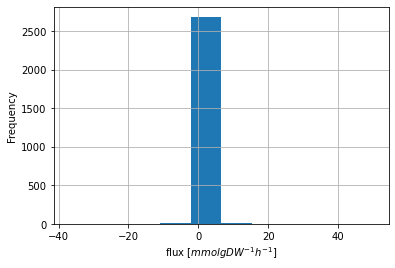

In [82]:
fig = solution.fluxes.hist()
fig.set_xlabel('flux [$mmol gDW^{-1} h^{-1}]$')
fig.set_ylabel('Frequency')

In [83]:
# filter non-zero fluxes
solution.fluxes[solution.fluxes != 0.]

SHK3Dr         0.106920
DHORTS        -0.145550
OMPDC          0.145550
G5SD           0.097264
CS             6.586366
                 ...   
TOCOPHS1       0.798972
TOCOPHOM1      0.798972
GGPS           0.798972
GGDR           0.798972
DM_avite1_c    0.798972
Name: fluxes, Length: 440, dtype: float64

In [84]:
solution.fluxes[solution.fluxes != 0.].describe()

count    440.000000
mean       0.568606
std        5.484719
min      -37.023882
25%        0.000098
50%        0.025011
75%        0.163218
max       49.974861
Name: fluxes, dtype: float64

Text(0, 0.5, 'Frequency')

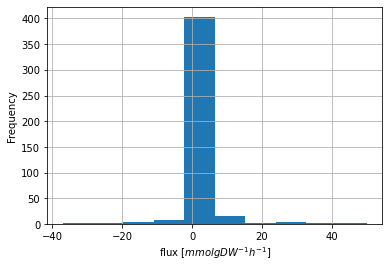

In [85]:
fig2 = solution.fluxes[solution.fluxes != 0.].hist()
fig2.set_xlabel('flux [$mmol gDW^{-1} h^{-1}]$')
fig2.set_ylabel('Frequency')

In [29]:
from cobra.flux_analysis import flux_variability_analysis

In [40]:
with model:
    reactions_subset = [model.reactions.EX_tyr__L_e, model.reactions.TOCOPHOM1, model.reactions.TYRTA]
    fva = flux_variability_analysis(model, reaction_list = reactions_subset, fraction_of_optimum=0.9)
print(fva)

              minimum  maximum
EX_tyr__L_e  0.000000  0.56469
TOCOPHOM1    1.100565  1.22285
TYRTA       -0.564690  0.00000


In [41]:
medium = model.medium
with model:
    model.reactions.EX_tyr__L_e.lower_bound = -10
    reactions_tt = [model.reactions.EX_tyr__L_e, model.reactions.TYRTA, model.reactions.TOCOPHOM1]
    fva = flux_variability_analysis(model, reaction_list = reactions_tt, fraction_of_optimum=0.9)
print(fva)

              minimum   maximum
EX_tyr__L_e -2.466999 -0.840082
TYRTA        0.840082  1.560858
TOCOPHOM1    1.404772  1.560858


In [51]:
medium = model.medium
with model:
    model.reactions.EX_tyr__L_e.lower_bound = -10
    #model.reactions.TYRTA.lower_bound = 1.5
    reactions_tt = [model.reactions.BIOMASS_Ec_iML1515_core_75p37M, model.reactions.EX_tyr__L_e, model.reactions.TYRTA, model.reactions.TOCOPHOM1]
    fva = flux_variability_analysis(model, reaction_list = reactions_tt, fraction_of_optimum=0.9)
print(fva)

                                 minimum   maximum
BIOMASS_Ec_iML1515_core_75p37M  0.000000  0.091468
EX_tyr__L_e                    -2.466999 -0.840082
TYRTA                           0.840082  1.560858
TOCOPHOM1                       1.404772  1.560858


## Fluxes with considering biomass growth rate

In [50]:
medium = model.medium
with model:
    model.reactions.BIOMASS_Ec_iML1515_core_75p37M.lower_bound = 0.44
    reactions_tt = [model.reactions.BIOMASS_Ec_iML1515_core_75p37M, model.reactions.EX_tyr__L_e, model.reactions.TYRTA, model.reactions.TOCOPHOM1]
    fva = flux_variability_analysis(model, reaction_list = reactions_tt, fraction_of_optimum=0.9)
print(fva)

                                 minimum   maximum
BIOMASS_Ec_iML1515_core_75p37M  0.440000  0.483911
EX_tyr__L_e                     0.000000  0.282438
TYRTA                          -0.343210 -0.060772
TOCOPHOM1                       0.552051  0.613390


When fixing the biomass growth to half of the optimal growth, the max. flux to alpha-tocopherol is 0.61

In [49]:
medium = model.medium
with model:
    model.reactions.EX_tyr__L_e.lower_bound = -10
    model.reactions.BIOMASS_Ec_iML1515_core_75p37M.lower_bound = 0.44
    reactions_tt = [model.reactions.BIOMASS_Ec_iML1515_core_75p37M, model.reactions.EX_tyr__L_e, model.reactions.TYRTA, model.reactions.TOCOPHOM1]
    fva = flux_variability_analysis(model, reaction_list = reactions_tt, fraction_of_optimum=0.9)
print(fva)

                                 minimum   maximum
BIOMASS_Ec_iML1515_core_75p37M  0.440000  0.485597
EX_tyr__L_e                    -1.331703 -0.488684
TYRTA                           0.427912  0.798973
TOCOPHOM1                       0.719075  0.798973


By simulating tyrosine uptake from the medium, the flux to alpha-tocopherol can be increased to 0.80

In [52]:
model.metabolites.tyr__L_c

Metabolite identifier,tyr__L_c
Name,L-Tyrosine
Memory address,0x07fe813873190
Formula,C9H11NO3
Compartment,c
In 6 reaction(s),"BIOMASS_Ec_iML1515_core_75p37M, TYRL, TYRt2rpp, BIOMASS_Ec_iML1515_WT_75p37M, TYRTA, TYRtipp"


In [53]:
model.reactions.TYRL

Reaction identifier,TYRL
Name,Tyrosine lyase
Memory address,0x07fe81598a550
Stoichiometry,amet_c + nadph_c + tyr__L_c --> 4crsol_c + dad_5_c + dhgly_c + h_c + met__L_c + nadp_c S-Adenosyl-L-methionine + Nicotinamide adenine dinucleotide phosphate - reduced + L-Tyrosine --> P-Cresol + 5'-Deoxyadenosine + Dehydroglycine + H+ + L-Methionine + Nicotinamide adenine...
GPR,b3991
Lower bound,0.0
Upper bound,1000.0


In [54]:
model.reactions.TYRtipp

Reaction identifier,TYRtipp
Name,L-tyrosine transport out (periplasm)
Memory address,0x07fe8158d90a0
Stoichiometry,tyr__L_c --> tyr__L_p L-Tyrosine --> L-Tyrosine
GPR,b1473
Lower bound,0.0
Upper bound,1000.0


In [55]:
model.reactions.TYRt2rpp

Reaction identifier,TYRt2rpp
Name,L-tyrosine reversible transport via proton symport (periplasm)
Memory address,0x07fe8148d3160
Stoichiometry,h_p + tyr__L_p <=> h_c + tyr__L_c H+ + L-Tyrosine <=> H+ + L-Tyrosine
GPR,b1907 or b0112
Lower bound,-1000.0
Upper bound,1000.0


In [57]:
medium = model.medium
with model:
    model.reactions.EX_tyr__L_e.lower_bound = -10
    model.reactions.BIOMASS_Ec_iML1515_core_75p37M.lower_bound = 0.44
    reactions_tt = [model.reactions.BIOMASS_Ec_iML1515_core_75p37M, model.reactions.BIOMASS_Ec_iML1515_WT_75p37M, model.reactions.TYRt2rpp, model.reactions.TYRtipp, model.reactions.TYRL]
    fva = flux_variability_analysis(model, reaction_list = reactions_tt, fraction_of_optimum=0.9)
print(fva)

                                 minimum    maximum
BIOMASS_Ec_iML1515_core_75p37M  0.440000   0.485597
BIOMASS_Ec_iML1515_WT_75p37M    0.000000   0.000000
TYRt2rpp                        0.488684  48.239408
TYRtipp                         0.000000  47.459561
TYRL                            0.000098   0.551953


In [58]:
medium = model.medium
with model:
    model.reactions.EX_tyr__L_e.lower_bound = -10
    model.reactions.BIOMASS_Ec_iML1515_core_75p37M.lower_bound = 0.44
    model.reactions.TYRt2rpp.upper_bound = 10
    model.reactions.TYRtipp.upper_bound = 10
    reactions_tt = [model.reactions.BIOMASS_Ec_iML1515_core_75p37M, model.reactions.EX_tyr__L_e, model.reactions.TYRTA, model.reactions.TOCOPHOM1]
    fva = flux_variability_analysis(model, reaction_list = reactions_tt, fraction_of_optimum=0.9)
print(fva)

                                 minimum   maximum
BIOMASS_Ec_iML1515_core_75p37M  0.440000  0.485597
EX_tyr__L_e                    -1.331703 -0.488684
TYRTA                           0.427912  0.798973
TOCOPHOM1                       0.719075  0.798973


In [65]:
with model:
    model.reactions.EX_tyr__L_e.lower_bound = -10
    model.reactions.BIOMASS_Ec_iML1515_core_75p37M.lower_bound = 0.44
    solution = model.optimize()
    #model.reactions.EX_glc__D_e.flux
    reaction_list = [solution.fluxes.TYRTA, solution.fluxes.EX_tyr__L_e]
    print(reaction_list)

[0.7989720203366939, -0.8597443803366946]


In [67]:
solution = model.optimize()
solution.fluxes.TYRL


0.0